In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import interpolation_runner as ip
import file_handler as fh

In [2]:
#FINDING TUR-VIOLATION REGIME


#--SETUP: ---------------------------------------------------------------------------------
VBs = np.linspace(0,0.5, 20) # np.linspace(-10000,10000, 100)
epsilons = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L
omega = 0.002
u_intra = 1000
u_inter = 800
gammaL = 0.005
gammaR = 0.005

INPUT = {
    'omega': omega, #1000
    'u_intra': u_intra, #2000
    'u_inter': u_inter, #1000
    'gammaL': gammaL, #0.5
    'gammaR': gammaR, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs, epsilons, **INPUT)

In [3]:
if T_L < T_R:
    raise SystemExit("Not my convention! (T_L < T_R)")
elif T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L
#elif T_L == T_R:

#Calculations of efficiency, sigma and TUR
eff_carnot = 1-(T_COLD/T_HOT)
eff = P/J_QH
P[(P < 0)] = np.nan
sigma = P*(1/T_COLD)*(eff_carnot-eff)/eff
TUR = I_var*sigma/(I**2)
print(np.nanmin(TUR))
print(np.sort(TUR[~np.isnan(TUR)]))



1.9672673337865518
[1.96726733 1.96751655 1.96818514 1.96820855 1.968558   1.96878862
 1.96897147 1.96910363 1.96959517 1.96973981 1.969921   1.97002212
 1.9704954  1.97051292 1.97062731 1.97090552 1.97093988 1.97104395
 1.97107403 1.97129014 1.97165368 1.97166252 1.97185621 1.97207081
 1.9720951  1.97215671 1.97226026 1.97267353 1.97277039 1.97285426
 1.97286666 1.97325851 1.97327004 1.97348112 1.97363981 1.97368145
 1.97368171 1.97368611 1.97410301 1.97426933 1.97434859 1.97442679
 1.97442958 1.97458944 1.97463638 1.97469068 1.97473173 1.97489409
 1.97501737 1.9752145  1.97536664 1.97541176 1.97542618 1.97549286
 1.97557294 1.97568649 1.97581903 1.97600226 1.9760071  1.97608693
 1.97623863 1.97639123 1.97649052 1.97665248 1.97667002 1.97667278
 1.97669936 1.97678936 1.97692611 1.97711263 1.97725922 1.97728382
 1.97730213 1.97754085 1.9775659  1.97757512 1.9776488  1.97780807
 1.97795539 1.97802926 1.97812799 1.97816991 1.97835882 1.9784102
 1.97850211 1.97857641 1.9786116  1.97861381

C:\Users\ag3830he\AppData\Local\Temp\ipykernel_23596\3588053304.py:12: RuntimeWarning: invalid value encountered in divide
  sigma = P*(1/T_COLD)*(eff_carnot-eff)/eff


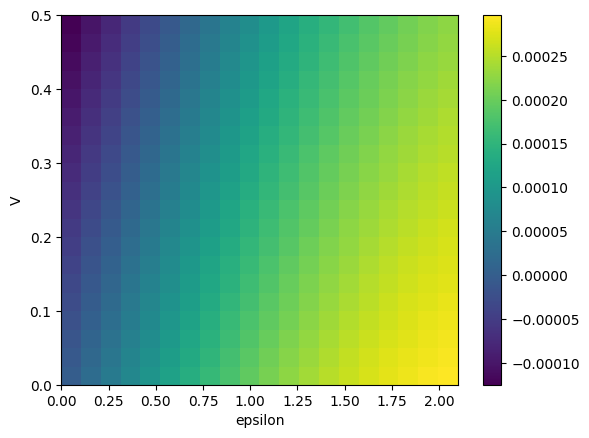

Text(0, 0.5, 'V')

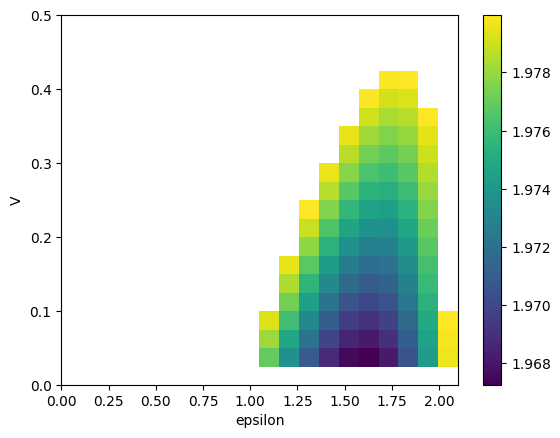

In [21]:

img = plt.imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('V')
#img.set_clim(-0.1, 0.1)  # Set color limits
plt.show()

TUR_masked = np.ma.masked_where(TUR >= 1.98, TUR)

img = plt.imshow(TUR_masked, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('V')
#for row in indices:
#    plt.scatter(Epsilon[row[0], row[1]],VB[row[0],row[1]],marker="o")
#img.set_clim(-0.1, 0.1)  # Set color limits

In [5]:
#Finding minimal TUR index

print(np.nanmin(TUR))

min_idx = np.argwhere(TUR == np.nanmin(TUR))
if len(min_idx) > 1:
    print("WARNING!! SOMETHING WIERD!") 
else:
    min_idx = min_idx[0]



print(min_idx[0], min_idx[1])
print(TUR[min_idx[0],min_idx[1]])
Epsilon, VB = np.meshgrid(epsilons, VBs)
VB_min = VB[min_idx[0],min_idx[1]]
print("Epsilon:", Epsilon[min_idx[0],min_idx[1]])
print("VB:", VB_min)

1.9672673337865518
1 15
1.9672673337865518
Epsilon: 1.6578947368421053
VB: 0.02631578947368421


In [6]:
#--SETUP: ---------------------------------------------------------------------------------
'''
epsilons = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)
T_L = 2.5 #100
T_R = 1 #T_L
omega = 0.002
u_intra = 1000
u_inter = 800
gammaL = 0.005
gammaR = 0.005

INPUT = {
    'omega': omega, #1000
    'u_intra': u_intra, #2000
    'u_inter': u_inter, #1000
    'gammaL': gammaL, #0.5
    'gammaR': gammaR, #0.5
    'T_L': T_L,
    'T_R': T_R,
}
'''

#--SETUP: ---------------------------------------------------------------------------------
lamdas = np.linspace(0,0.999,21)

INPUT2 = {
    'omega': omega,
    'u_intra': u_intra,
    'u_inter': u_inter,
    'V_B': VB_min,
    'gammaL': gammaL,
    'gammaR': gammaR,
    'T_L': T_L,
    'T_R': T_R,
}
       

In [8]:
I2, I_var2, J_QH2, P2, eff2, sigma2, TUR2 = ip.run_interpolation(epsilons, lamdas, **INPUT2)

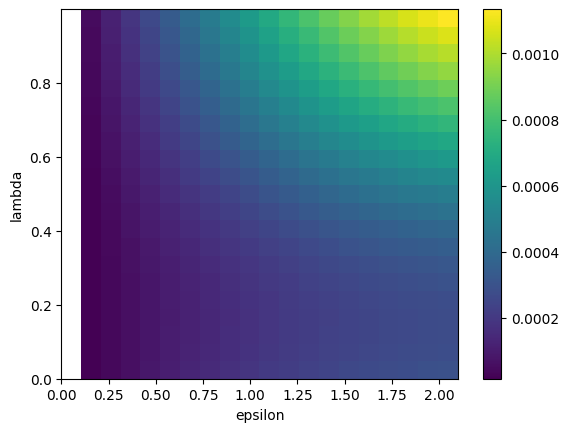

Text(0, 0.5, 'lambda')

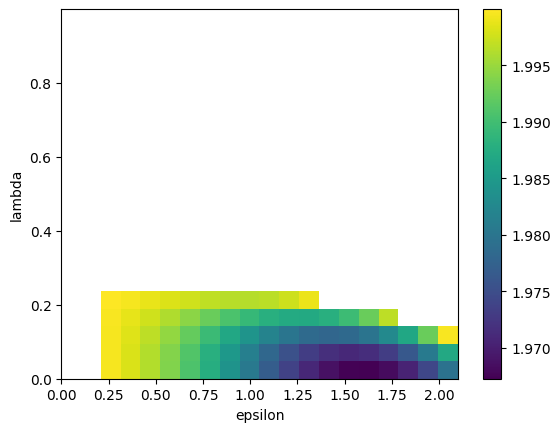

In [23]:
img = plt.imshow(I2, extent=[epsilons[0], epsilons[-1], lamdas[0], lamdas[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('lambda')
#img.set_clim(-0.1, 0.1)  # Set color limits
plt.show()

TUR_masked2 = np.ma.masked_where(TUR2 >= 2, TUR2)

img = plt.imshow(TUR_masked2, extent=[epsilons[0], epsilons[-1], lamdas[0], lamdas[-1]], aspect='auto', origin='lower')
plt.colorbar()
#img.set_clim(0, 2)  # Set color limits
plt.xlabel('epsilon')
plt.ylabel('lambda')

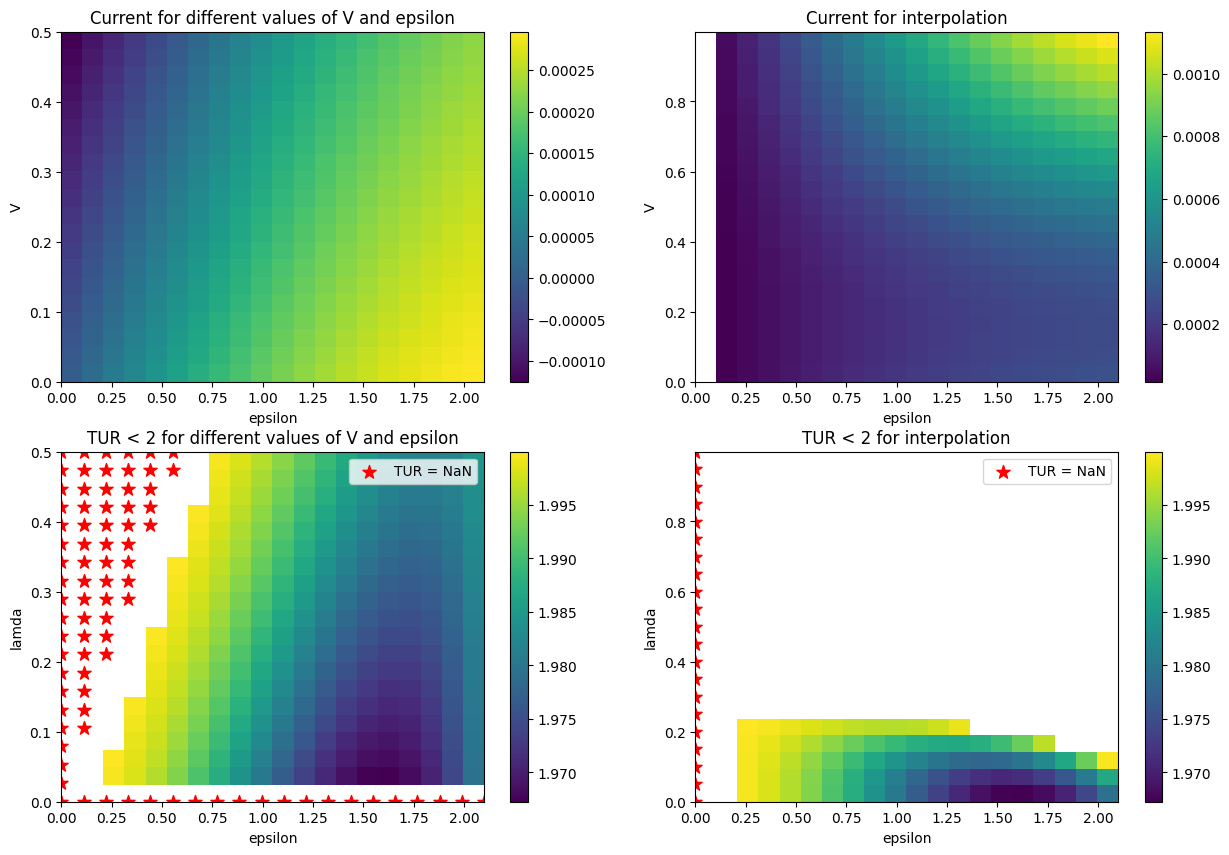

minimal TUR serial dot:  1.9672673337865518
minimal TUR when interpolating:  1.9672673337865518


In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot on different subplots using the axes array
img = axes[0, 0].imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
fig.colorbar(img, ax=axes[0, 0]) 
axes[0, 0].set_title("Current for different values of V and epsilon")
axes[0, 0].set_xlabel('epsilon')
axes[0, 0].set_ylabel('V')
#img.set_clim(-0.1, 0.1)  # Set color limits

TUR_masked = np.ma.masked_where(TUR >= 2, TUR)

img2 = axes[1,0].imshow(TUR_masked, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
fig.colorbar(img2, ax=axes[1, 0]) 
# Find NaN positions
nan_positions = np.argwhere(np.isnan(TUR))  # Get (row, col) indices of NaNs
# Convert indices to coordinate system of `extent`
x_nan = epsilons[nan_positions[:, 1]]  # Convert column index to x-coordinates
y_nan = VBs[nan_positions[:, 0]]  # Convert row index to y-coordinates
# Scatter stars at NaN locations
axes[1, 0].scatter(x_nan, y_nan, color='red', marker='*', s=100, label="TUR = NaN")
axes[1, 0].set_title("TUR < 2 for different values of V and epsilon")
axes[1, 0].set_xlabel('epsilon')
axes[1, 0].set_ylabel('lamda')
axes[1,0].legend()

img3 = axes[0,1].imshow(I2, extent=[epsilons[0], epsilons[-1], lamdas[0], lamdas[-1]], aspect='auto', origin='lower')
fig.colorbar(img3, ax=axes[0, 1])
axes[0, 1].set_title("Current for interpolation")
axes[0, 1].set_xlabel('epsilon')
axes[0, 1].set_ylabel('V')

TUR_masked2 = np.ma.masked_where(TUR2 >= 2, TUR2)

img4 = axes[1,1].imshow(TUR_masked2, extent=[epsilons[0], epsilons[-1], lamdas[0], lamdas[-1]], aspect='auto', origin='lower')
# Find NaN positions
nan_positions = np.argwhere(np.isnan(TUR2))  # Get (row, col) indices of NaNs
# Convert indices to coordinate system of `extent`
x_nan = epsilons[nan_positions[:, 1]]  # Convert column index to x-coordinates
y_nan = lamdas[nan_positions[:, 0]]  # Convert row index to y-coordinates
# Scatter stars at NaN locations
axes[1, 1].scatter(x_nan, y_nan, color='red', marker='*', s=100, label="TUR = NaN") 
fig.colorbar(img4, ax=axes[1, 1]) 
#img.set_clim(0, 2)  # Set color limits
axes[1, 1].set_title("TUR < 2 for interpolation")
axes[1, 1].set_xlabel('epsilon')
axes[1, 1].set_ylabel('lamda')
axes[1,1].legend()

plt.show()

print("minimal TUR serial dot: ", np.nanmin(TUR))
print("minimal TUR when interpolating: ", np.nanmin(TUR2))
